# Import Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = r"/Users/jungjungchen/Downloads/healthcare_dataset.csv"  
df = pd.read_csv(file_path)

In [2]:
print(df.head())

            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

# Data Cleaning

### Summary statistics of the numerical columns

In [4]:
print(df.describe()) 

                Age  Billing Amount   Room Number
count  55500.000000    55500.000000  55500.000000
mean      51.539459    25539.316097    301.134829
std       19.602454    14211.454431    115.243069
min       13.000000    -2008.492140    101.000000
25%       35.000000    13241.224652    202.000000
50%       52.000000    25538.069376    302.000000
75%       68.000000    37820.508436    401.000000
max       89.000000    52764.276736    500.000000


### Summary statistics of the categorical columns

In [5]:
print(df.describe(include='object'))

               Name Gender Blood Type Medical Condition Date of Admission  \
count         55500  55500      55500             55500             55500   
unique        49992      2          8                 6              1827   
top     DAvId muNoZ   Male         A-         Arthritis        2024-03-16   
freq              3  27774       6969              9308                50   

               Doctor   Hospital Insurance Provider Admission Type  \
count           55500      55500              55500          55500   
unique          40341      39876                  5              3   
top     Michael Smith  LLC Smith              Cigna       Elective   
freq               27         44              11249          18655   

       Discharge Date Medication Test Results  
count           55500      55500        55500  
unique           1856          5            3  
top        2020-03-15    Lipitor     Abnormal  
freq               53      11140        18627  


### Unique values analysis for categorical columns

In [6]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col} Unique Values: {df[col].nunique()}")
    print(df[col].value_counts(), "\n")

Name Unique Values: 49992
DAvId muNoZ       3
SOnYa aDams       2
terRY gONZaLeZ    2
JaCKsON BARbeR    2
doNALD aViLA      2
                 ..
lInDA JOhNSOn     1
tyLer paRk        1
caROl MyERS       1
sHEila MCmaHoN    1
HARoLD ACOSTa     1
Name: Name, Length: 49992, dtype: int64 

Gender Unique Values: 2
Male      27774
Female    27726
Name: Gender, dtype: int64 

Blood Type Unique Values: 8
A-     6969
A+     6956
AB+    6947
AB-    6945
B+     6945
B-     6944
O+     6917
O-     6877
Name: Blood Type, dtype: int64 

Medical Condition Unique Values: 6
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: Medical Condition, dtype: int64 

Date of Admission Unique Values: 1827
2024-03-16    50
2022-07-24    49
2020-10-22    49
2021-12-28    48
2021-01-03    48
              ..
2023-04-12    14
2022-05-28    14
2022-05-23    13
2019-07-22    13
2022-02-05    12
Name: Date of Admission, Length: 1827, dtype

### Checking for missing values

In [7]:
print(df.isnull().sum())

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


### Standardizing the capitalization of names

In [8]:
df["Name"] = df["Name"].str.title()

In [9]:
print(df.head())

            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby Jackson   30    Male         B-            Cancer        2024-01-31   
1   Leslie Terry   62    Male         A+           Obesity        2019-08-20   
2    Danny Smith   76  Female         A-           Obesity        2022-09-22   
3   Andrew Watts   28  Female         O+          Diabetes        2020-11-18   
4  Adrienne Bell   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

### Fixing misaligned text in hospital column

In [13]:
df["Hospital"] = (
    df["Hospital"]
    .str.replace(",", " ", regex=True)         
    .str.replace(r"\bAnd\b", "", regex=True)  
    .str.replace(r"\($", "", regex=True)      
    .str.rstrip("'")                           
    .str.replace(r"\s+", " ", regex=True)
    .str.title().str.strip()                   
)

In [14]:
print(df["Hospital"].unique())

['Sons Miller' 'Kim Inc' 'Cook Plc' ... 'Guzman Jones Graves'
 'Williams Brown Mckenzie' 'Moreno Murphy Griffith']


In [15]:
print(df["Hospital"].head(10)) 

0               Sons Miller
1                   Kim Inc
2                  Cook Plc
3     Hernandez Rogers Vang
4               White-White
5            Nunez-Humphrey
6           Group Middleton
7    Powell Robinson Valdez
8                 Sons Rich
9            Padilla-Walker
Name: Hospital, dtype: object


### Remove duplicates columns and keep unique columns

In [16]:
df["Name"] = df["Name"].str.title().str.strip()
df = df.drop_duplicates(subset=["Name", "Date of Admission"], ignore_index=True)

In [17]:
df["Doctor"] = df["Doctor"].str.title().str.strip()

df["Doctor"].value_counts().head(10)

Michael Smith        24
John Smith           21
Robert Smith         19
Michael Johnson      19
David Smith          18
Michael Williams     17
James Smith          17
Robert Johnson       17
Christopher Smith    16
Matthew Smith        16
Name: Doctor, dtype: int64

In [18]:
df["Hospital"] = df["Hospital"].str.title().str.strip()

df["Hospital"].value_counts().head(10)

Llc Smith      40
Smith Ltd      35
Johnson Plc    35
Ltd Smith      35
Smith Plc      33
Smith Group    32
Sons Smith     31
Group Smith    30
Johnson Inc    29
Smith Inc      29
Name: Hospital, dtype: int64

### Convert admission date and discharge date to datetime

In [19]:
df["Date of Admission"] = pd.to_datetime(df["Date of Admission"])
df["Discharge Date"] = pd.to_datetime(df["Discharge Date"])

### Correct discharge dates where is earlier than admission date

In [20]:
df.loc[df["Discharge Date"] < df["Date of Admission"], "Discharge Date"] = df["Date of Admission"]

df[df["Discharge Date"] < df["Date of Admission"]]

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results


# Data Visualization

### Common medical conditions distribution

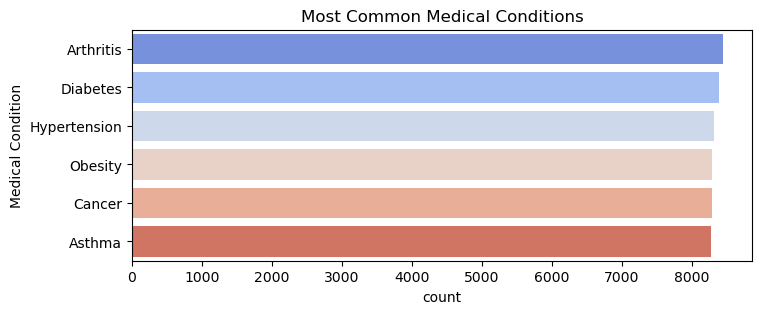

In [21]:
plt.figure(figsize=(8,3))
sns.countplot(y=df["Medical Condition"], order=df["Medical Condition"].value_counts().index, palette=sns.color_palette("coolwarm", 6))
plt.title("Most Common Medical Conditions")
plt.show()

### Age distribution

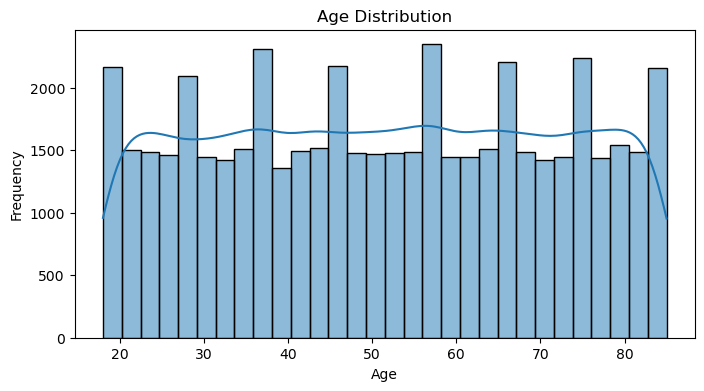

In [22]:
plt.figure(figsize=(8,4))
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

### Admission types distribution

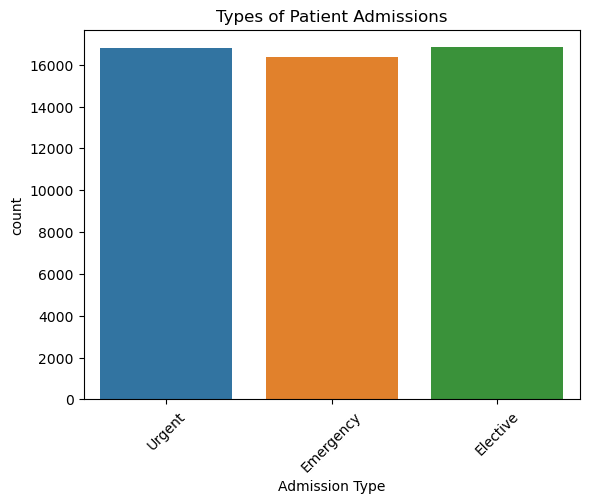

In [23]:
sns.countplot(x="Admission Type", data=df)
plt.title("Types of Patient Admissions")
plt.xticks(rotation=45)
plt.show()

### Billing amounts distribution

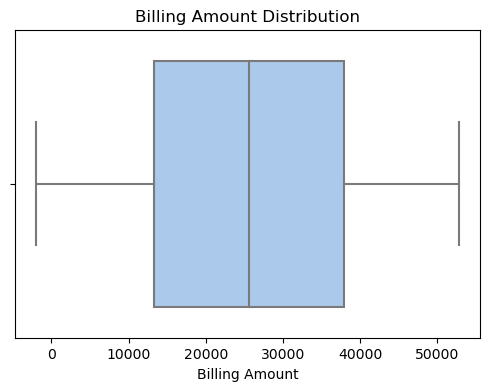

In [24]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Billing Amount"], palette="pastel")
plt.title("Billing Amount Distribution")
plt.show()

### Test results distribution

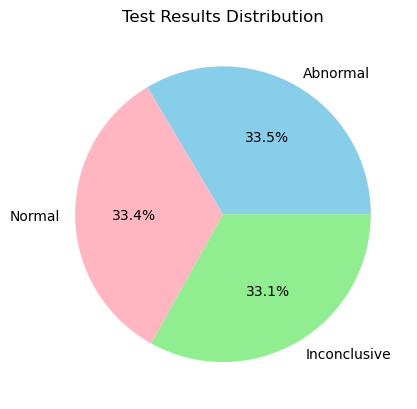

In [25]:
df["Test Results"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["skyblue", "lightpink", "lightgreen"])
plt.title("Test Results Distribution")
plt.ylabel(None)
plt.show()

### Count test results grouped by medication

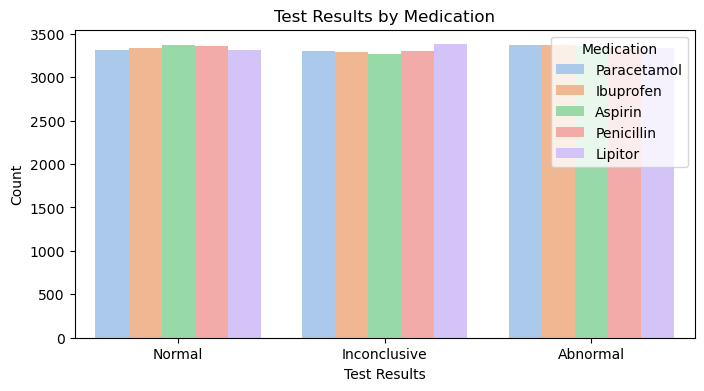

In [26]:
plt.figure(figsize=(8,4))
sns.countplot(x="Test Results", hue="Medication", data=df, palette="pastel")

plt.title("Test Results by Medication")
plt.xlabel("Test Results")
plt.ylabel("Count")
plt.legend(title="Medication")

plt.show()

### Test Results Summary by Medical Condition

In [27]:
test_results_summary = df.pivot_table(
    index="Medical Condition", 
    columns="Test Results", 
    aggfunc="size", 
    fill_value=0
)

test_results_summary.columns.name = "Test Results"
test_results_summary

Test Results,Abnormal,Inconclusive,Normal
Medical Condition,,,
Arthritis,2907,2788,2742
Asthma,2697,2720,2854
Cancer,2796,2747,2746
Diabetes,2830,2765,2786
Hypertension,2720,2789,2807
Obesity,2818,2728,2746
